In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
kings_data = pd.read_csv("../Resources/cleaned_df.csv")

In [3]:
kings_data.head()

,YEAR,PLAYER,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2015,Stephen Curry,Golden State Warriors,11370786,28,79,71,8,34.2,30.1,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
1,2015,Shaun Livingston,Golden State Warriors,5543725,30,78,69,9,19.5,6.3,...,3.0,1.0,0.7,0.3,1.8,15.6,0,0,2.7,132
2,2015,Marreese Speights,Golden State Warriors,3815000,28,72,64,8,11.6,7.1,...,0.8,0.9,0.3,0.5,1.6,13.7,1,0,0.2,183
3,2015,Leandro Barbosa,Golden State Warriors,2500000,33,68,60,8,15.9,6.4,...,1.2,0.8,0.6,0.1,1.6,11.8,0,0,0.6,243
4,2015,Klay Thompson,Golden State Warriors,15501000,26,80,71,9,33.3,22.1,...,2.1,1.7,0.8,0.6,1.9,32.2,0,0,10.5,31


In [4]:
kings_cleansed_df = kings_data.loc[kings_data['TEAM']== 'Sacramento Kings']
kings_cleansed_df = kings_cleansed_df.loc[kings_cleansed_df['YEAR']== 2018]
kings_cleansed_df

,YEAR,PLAYER,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
271,2018,BJ Johnson,Sacramento Kings,42634,23,1,0,1,6.1,2.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0,0,-2.0,493
272,2018,Ben McLemore,Sacramento Kings,5460000,26,19,7,12,8.3,3.9,...,0.2,0.3,0.3,0.2,1.2,6.5,0,0,-0.9,184
273,2018,Bogdan Bogdanovic,Sacramento Kings,9000000,26,70,32,38,27.8,14.1,...,3.8,1.7,1.0,0.2,2.0,26.1,1,0,-0.6,131
274,2018,Buddy Hield,Sacramento Kings,3844760,26,82,39,43,31.9,20.7,...,2.5,1.8,0.7,0.4,2.5,32.0,3,0,0.0,222
275,2018,Caleb Swanigan,Sacramento Kings,1740000,22,3,0,3,11.0,2.7,...,1.3,0.7,0.7,0.3,2.0,11.8,0,0,-0.3,316
276,2018,Corey Brewer,Sacramento Kings,2000000,33,24,8,16,14.7,4.1,...,1.2,0.5,0.8,0.2,2.0,11.5,0,0,0.2,303
277,2018,De'Aaron Fox,Sacramento Kings,5470920,21,81,39,42,31.4,17.3,...,7.3,2.8,1.6,0.6,2.5,36.5,16,1,0.8,183
278,2018,Harrison Barnes,Sacramento Kings,24107258,27,28,11,17,33.9,14.3,...,1.9,1.1,0.6,0.1,1.5,24.7,3,0,0.9,30
279,2018,Harry Giles III,Sacramento Kings,2207040,21,58,26,32,14.1,7.0,...,1.5,1.3,0.5,0.4,2.6,15.3,0,0,-1.8,293
280,2018,Iman Shumpert,Sacramento Kings,11011234,29,42,24,18,26.2,8.9,...,2.2,0.9,1.1,0.5,2.2,19.7,0,0,-1.0,113


([<matplotlib.axis.YTick at 0x29d0e3ab320>,
 <a list of 20 Text yticklabel objects>)

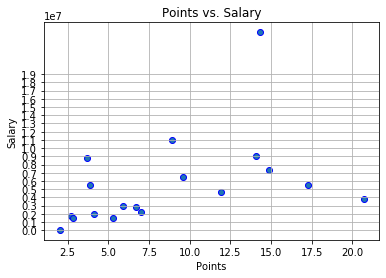

In [5]:
x_PTS = kings_cleansed_df['PTS']
y_Salary = kings_cleansed_df['SALARY']
plt.scatter(x_PTS,y_Salary,marker = 'o',edgecolors = 'blue')
plt.title("Points vs. Salary")
plt.xlabel("Points")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x24fffe87048>,
 <a list of 20 Text yticklabel objects>)

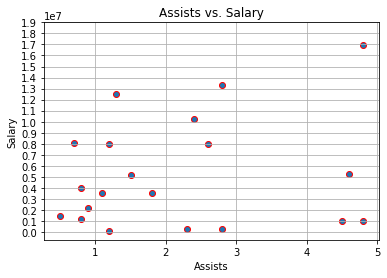

In [6]:
x_assists = kings_cleansed_df['AST']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_assists,y_Salary,marker = 'o',edgecolors = 'red')
plt.title("Assists vs. Salary")
plt.xlabel("Assists")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x29d0e48f240>,
 <a list of 20 Text yticklabel objects>)

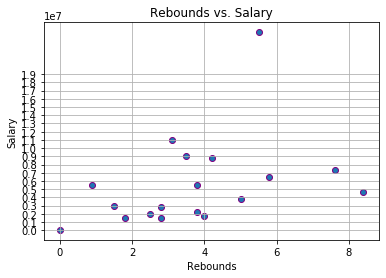

In [6]:
x_rebound = kings_cleansed_df['REB']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_rebound,y_salary,marker = 'o',edgecolors = 'purple')
plt.title("Rebounds vs. Salary")
plt.xlabel("Rebounds")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x24f81023fd0>,
 <a list of 20 Text yticklabel objects>)

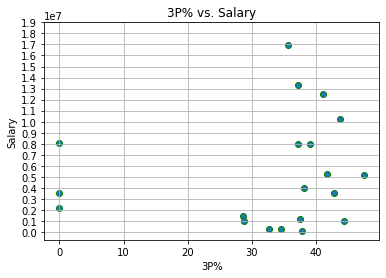

In [9]:
x_three = kings_cleansed_df['3P%']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_three,y_salary,marker = 'o',edgecolors = 'green')
plt.title("3P% vs. Salary")
plt.xlabel("3P%")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x29d0e52c278>,
 <a list of 20 Text yticklabel objects>)

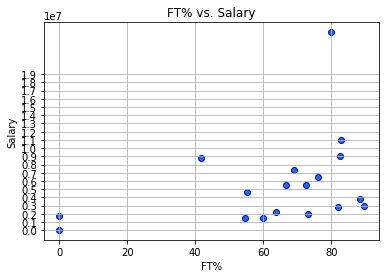

In [7]:
x_free = kings_cleansed_df['FT%']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_free,y_salary,marker = 'o',edgecolors = 'blue')
plt.title("FT% vs. Salary")
plt.xlabel("FT%")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))